# Loading All Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# First Know our data Or Structures of the data

In [4]:
print("Dataset contains number of rows:-",df.shape[0], "and columns:-", df.shape[1])

Dataset contains number of rows:- 1338 and columns:- 7


**Conclusion**:-

- In our data, there are 7(including target(expenses) column) columns and 1338 rows.

In [5]:
df.info() # for Checking the data typre of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Conclusions :-**

- In our data, there are seven columns (age, sex, bmi, children, smoker, redion, expenses), and the data types of these columns are given above.
- Age, bmi, Children, expenses ---> Numerical columns
sex, smoker, region ---> categorical columns


In [6]:
df.isnull().sum()  # For Missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Conclusion:-**

- There are no null values in our data.

In [7]:
df.describe()  # for the descriptive analysis of the dataset

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

# EDA (Exploratory Data Analysis)

<Axes: >

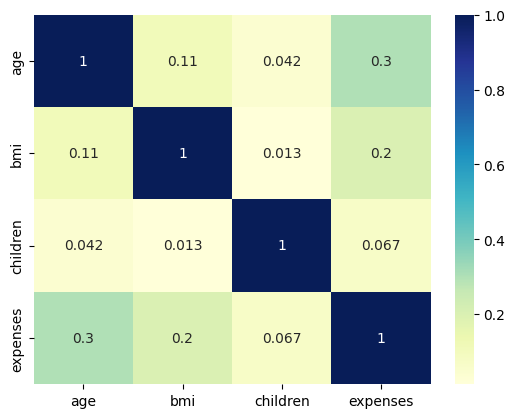

In [9]:
correlation = df.corr(method='pearson', min_periods=1, numeric_only=True)
sns.heatmap(correlation, cmap="YlGnBu", annot=True)

**Conclusion :-**

Simply form the above table, and we say that the correlation coefficient between age and expenses is 0.3 and BMI vs. expenses is 0.2, which is high relative to others.

<Axes: ylabel='count'>

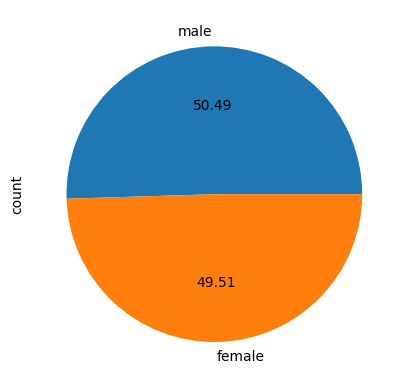

In [10]:
df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

<Axes: ylabel='count'>

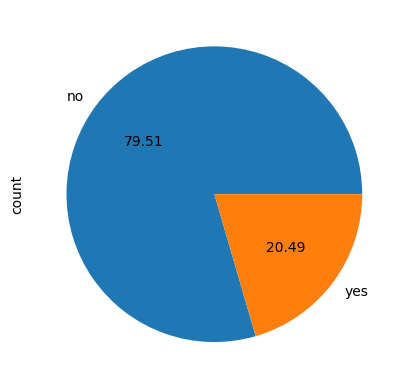

In [11]:
df['smoker'].value_counts(ascending=False).plot(kind = 'pie',autopct='%.2f')

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/3387353168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='children', data=df, palette="Set1")


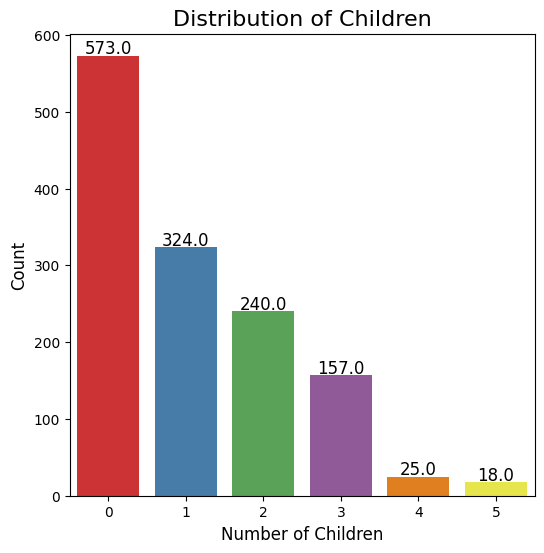

In [12]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='children', data=df, palette="Set1")
plt.title("Distribution of Children", fontsize=16)
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/744405539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='smoker',data= df,palette="Set1")


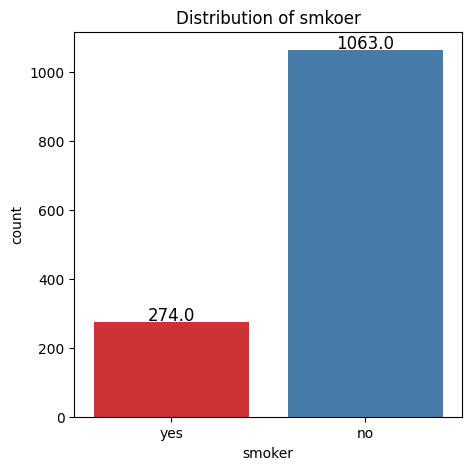

In [13]:
# for Children column
plt.figure(figsize = (5,5))
ax = sns.countplot(x='smoker',data= df,palette="Set1")

plt.title("Distribution of smkoer")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/3836605708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='region',data= df,palette="Set1" )


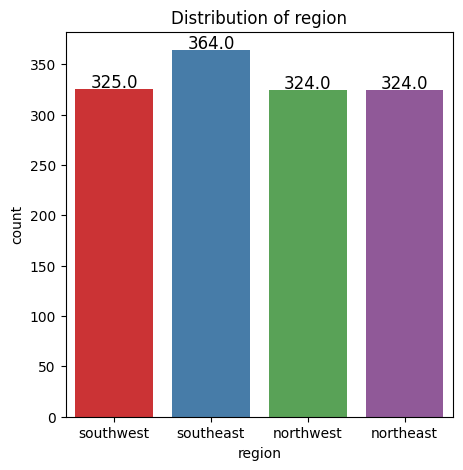

In [14]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x='region',data= df,palette="Set1" )
plt.title("Distribution of region")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

## Distribution of the features

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

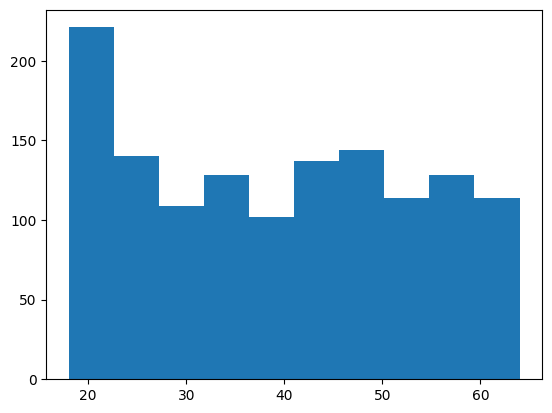

In [15]:
# histogram of age
df.age.mean()
import matplotlib.pyplot as plt
plt.hist(df["age"],bins = 10)

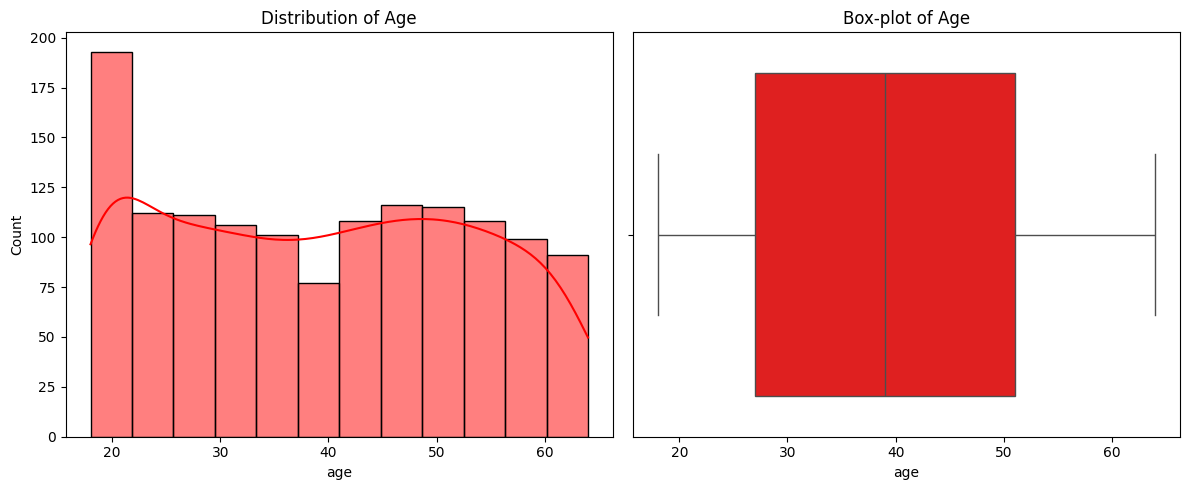

In [16]:
# for age
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["age"], kde=True, color="red")
plt.title("Distribution of Age")


plt.subplot(1, 2, 2)
sns.boxplot(x=df["age"], color="red")
plt.title("Box-plot of Age")

plt.tight_layout()
plt.show()


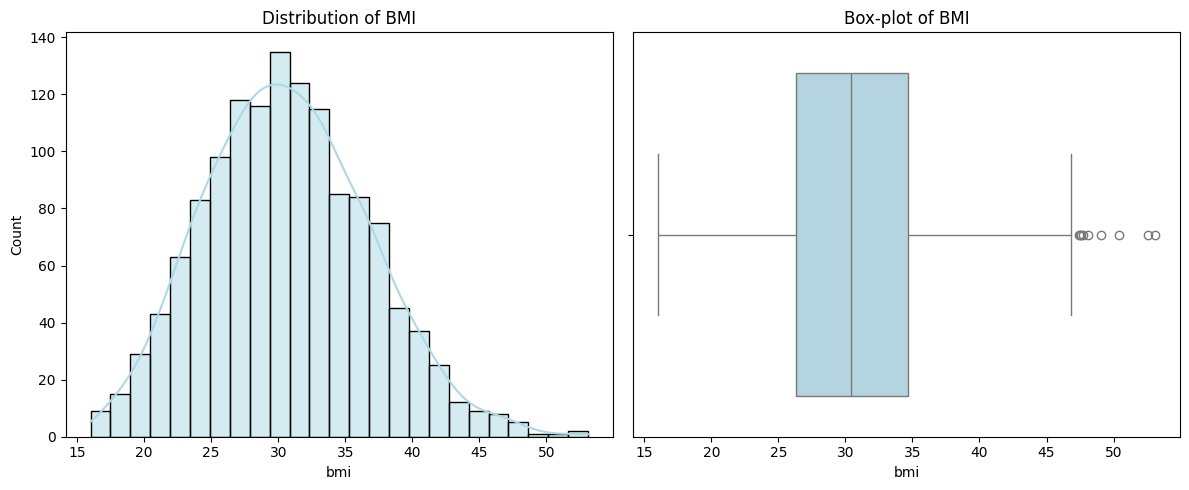

In [17]:
# for bmi
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df["bmi"], kde=True, color="lightblue")
plt.title("Distribution of BMI")

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["bmi"], color="lightblue")
plt.title("Box-plot of BMI")

plt.tight_layout()
plt.show()

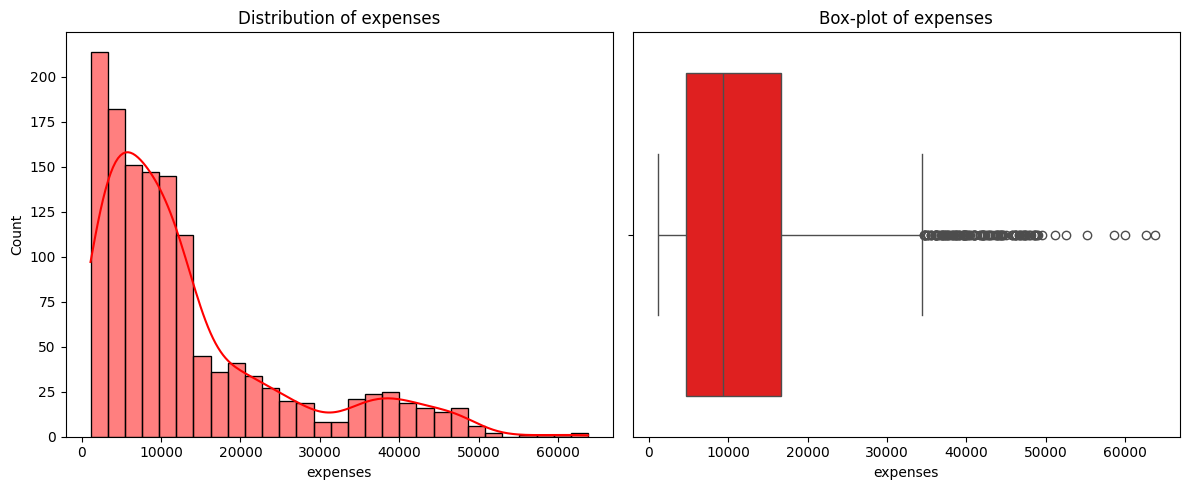

In [18]:
# for exp
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["expenses"], kde=True, color="red")
plt.title("Distribution of expenses")


plt.subplot(1, 2, 2)
sns.boxplot(x=df["expenses"], color="red")
plt.title("Box-plot of expenses")

plt.tight_layout()
plt.show()

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/1759477170.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='age',y='expenses',data= df, color="red", ci = False)


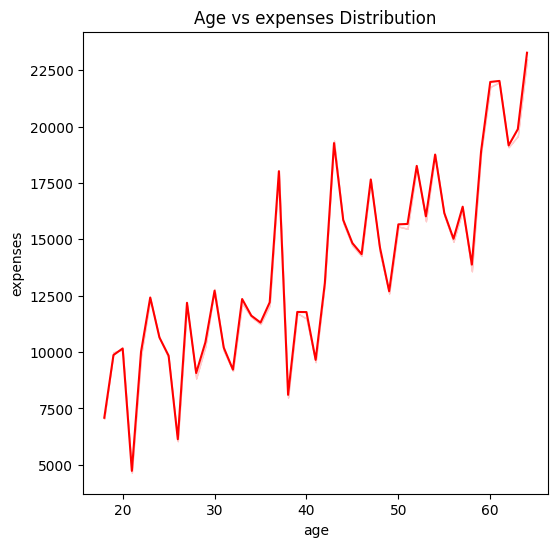

In [19]:
# Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='expenses',data= df, color="red", ci = False)
plt.title('Age vs expenses Distribution')
plt.show()


/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/3453019042.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='sex',y='expenses',data= df , ci=None, palette="Set1")
/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/3453019042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sex',y='expenses',data= df , ci=None, palette="Set1")


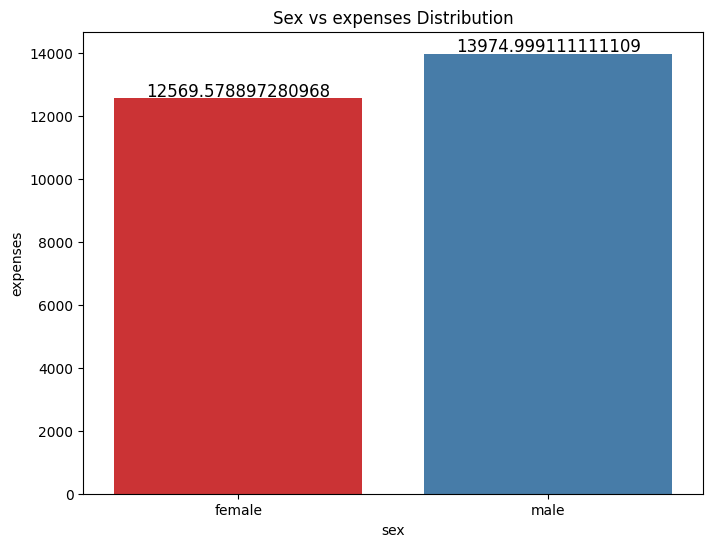

In [20]:
#Barplot for Sex and Charges
plt.figure(figsize=(8,6))
ax = sns.barplot(x='sex',y='expenses',data= df , ci=None, palette="Set1")
plt.title('Sex vs expenses Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()
plt.show()

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/480017081.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='children',y='expenses',data= df , ci=None, palette="Set1")
/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/480017081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='children',y='expenses',data= df , ci=None, palette="Set1")


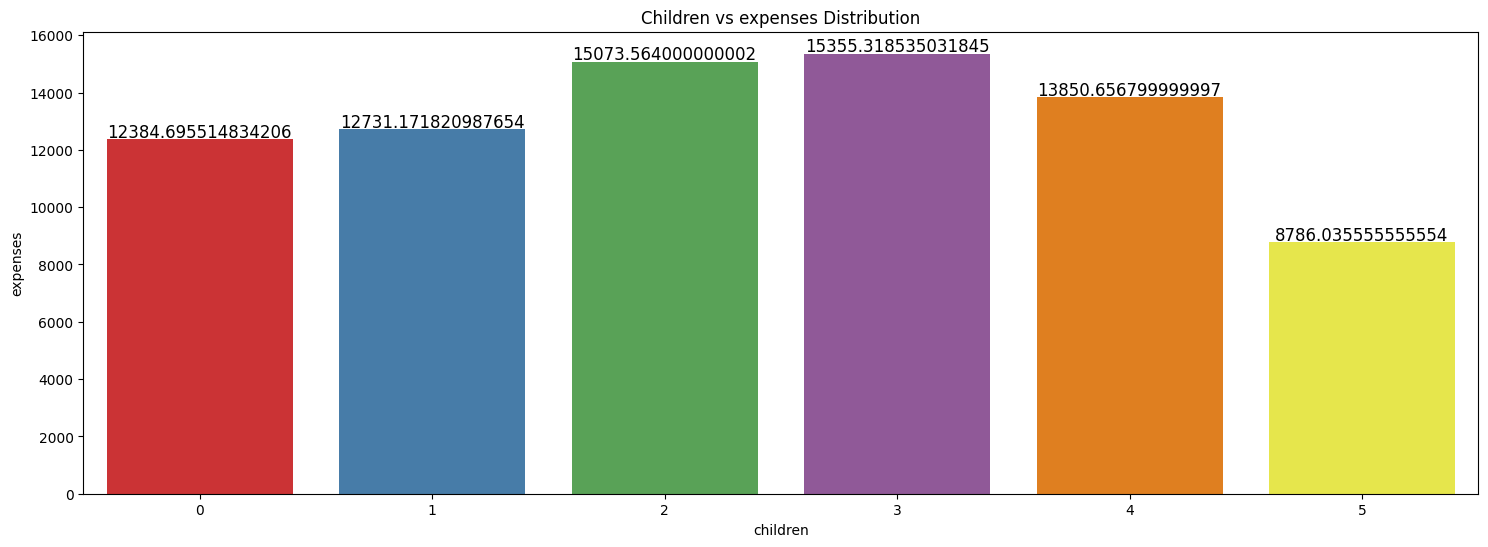

In [21]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x='children',y='expenses',data= df , ci=None, palette="Set1")
plt.title('Children vs expenses Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/894371183.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='region',y='expenses',data= df , ci = None, palette="Set1")
/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_5195/894371183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='region',y='expenses',data= df , ci = None, palette="Set1")


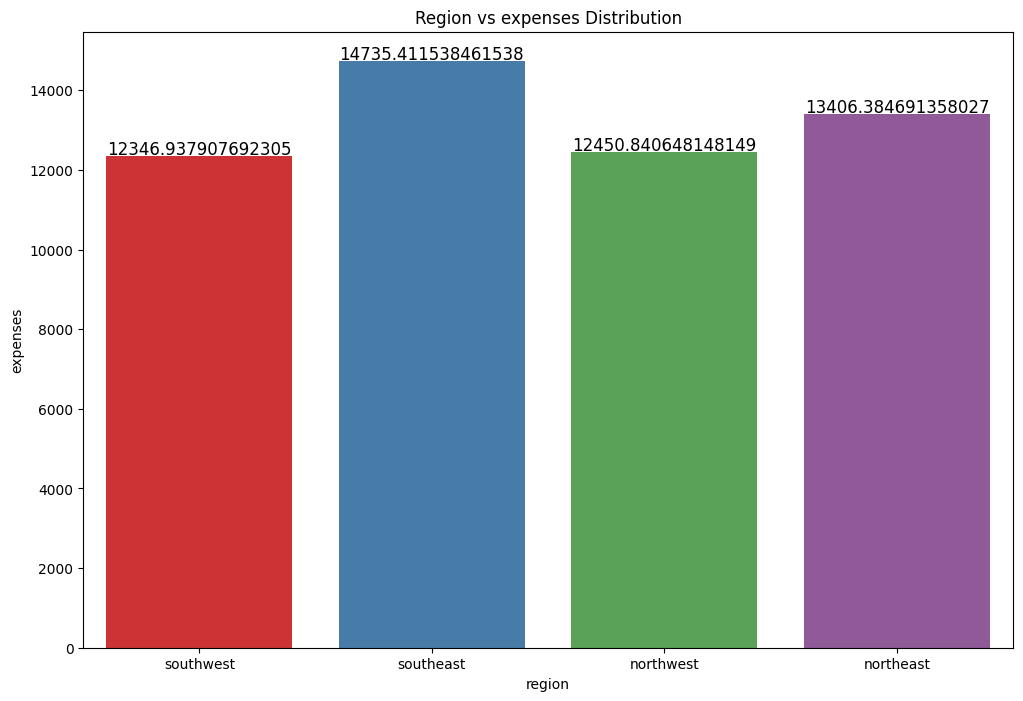

In [22]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='region',y='expenses',data= df , ci = None, palette="Set1")
plt.title('Region vs expenses Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

# Feature Engineering and Model building

### Spliting the data into train dataset and test dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["expenses"]),df["expenses"],test_size = 0.2, random_state= 5)

In [24]:
X_train.shape , X_test.shape

((1069, 6), (268, 6))

In [27]:
X_train

,age,sex,bmi,children,smoker,region
997,63,female,36.9,0,no,southeast
1174,29,male,32.1,2,no,northwest
207,35,male,27.7,2,yes,northeast
670,30,male,31.6,3,no,southeast
293,22,female,28.8,0,no,southeast
...,...,...,...,...,...,...
73,58,male,32.0,1,no,southeast
1143,39,male,32.3,2,no,southeast
999,36,female,26.9,0,no,northwest
206,59,male,26.4,0,no,southeast


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [31]:
trf1 = ColumnTransformer([
    ("ohe_sex",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["sex"]),
    ("ohe_smoker",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["smoker"]),
    ("ohe_region",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["region"])
], remainder='passthrough')

In [34]:
trf2 = LinearRegression()

In [35]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(trf1, trf2)
pipe

/opt/anaconda3/envs/venv2/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [36]:
pipe.fit(X_train, y_train)

/opt/anaconda3/envs/venv2/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [38]:
predict_lr = pipe.predict(X_test)

In [41]:
# Lasso / L2
from sklearn.linear_model import Lasso
pipe2 = make_pipeline(
    trf1,        
    Lasso(alpha=10)  
)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('lasso', Lasso(alpha=10))])

In [42]:
pipe2.fit(X_train, y_train)

/opt/anaconda3/envs/venv2/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('lasso', Lasso(alpha=10))])

In [43]:
predict_lasso = pipe2.predict(X_test)

In [45]:
# Ridge/L2
from sklearn.linear_model import Ridge
pipe3 = make_pipeline(
    trf1,        
    Ridge(alpha=0.1)  
)
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('ridge', Ridge(alpha=0.1))])

In [46]:
pipe3.fit(X_train, y_train)
predict_ridge = pipe3.predict(X_test)

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,StackingRegressor

In [49]:
pipe4 = make_pipeline(
    trf1,
    DecisionTreeRegressor()
)

In [50]:
pipe4.fit(X_train, y_train)
predict_dtr = pipe4.predict(X_test)

In [51]:
pipe5 = make_pipeline(
    trf1,
    RandomForestRegressor()
)
pipe5.fit(X_train, y_train)
predict_rf = pipe5.predict(X_test)

In [53]:
r2_lr = r2_score(y_test, predict_lr)
r2_las = r2_score(y_test, predict_lasso)
r2_ridge = r2_score(y_test, predict_ridge)
r2_dtr = r2_score(y_test, predict_dtr)
r2_rf = r2_score(y_test, predict_rf)

In [58]:
gbr = GradientBoostingRegressor()
pipe6 = make_pipeline(
    trf1,
    gbr
)
pipe6.fit(X_train, y_train)
predict_gbr = pipe6.predict(X_test)
r2_gbr = r2_score(y_test,predict_gbr)

In [66]:
estimators = [
    ('las', Lasso(alpha=10)),
    ('rid', Ridge(alpha=0.1)),
    ('dtr', DecisionTreeRegressor(random_state=42)),
    ('rfr', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]


In [67]:
clf = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression(),
    n_jobs=-1, cv=5
)

In [68]:
pipe7 = make_pipeline(
    trf1,  # Apply transformations such as one-hot encoding
    clf    # Apply the Stacking Regressor
)


In [69]:
pipe7.fit(X_train, y_train)

/opt/anaconda3/envs/venv2/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('stackingregressor',
                 StackingRegressor(cv=5,
                                   estimators=[('las', Lasso(alpha=10)),
                                               ('rid', Ridge(alpha=0.1)),
                                               ('dtr',
                                                DecisionTreeRegressor(random_state=42)),
                                               ('rfr',
                                                RandomForestRegressor(random_state=42)),
                                               ('gbr',
                                                GradientBoostingRegressor(random_state=42))],
                                   final_estimator=LinearRegression(),
                                   n_jobs=-1))])

In [70]:
predict_str = pipe7.predict(X_test)
r2_str = r2_score(y_test,predict_str)

In [71]:
performance_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression",
              "Decision Tree", "Random Forest","Gradient Boosting",
              "Stacking"],
    "R2 Score": [r2_lr, r2_las, r2_ridge, r2_dtr, r2_rf, r2_gbr, r2_str]
})

In [72]:
performance_df = performance_df.sort_values(by="R2 Score", ascending=False)

In [73]:
performance_df

,Model,R2 Score
5,Gradient Boosting,0.838711
6,Stacking,0.837922
4,Random Forest,0.823709
3,Decision Tree,0.724790
1,Lasso Regression,0.720760
2,Ridge Regression,0.720654
0,Linear Regression,0.720642


# Testing phase

In [84]:

input_data = [
    [19, "female", 27.9, 0, "yes", "southwest"]
]
input_df = pd.DataFrame(input_data, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])


output = 16884.92

In [88]:
print("Prediction from Linear Rigression:", pipe.predict(input_df))
print("Prediction from Ridge:", pipe3.predict(input_df))
print("Prediction from Decision Tree:", pipe4.predict(input_df))
print("Prediction from Random Forest:", pipe5.predict(input_df))
print("Prediction from Gradient Boosting:", pipe6.predict(input_df))
print("Prediction from Stacking:", pipe7.predict(input_df))


Prediction from Linear Rigression: [25330.02313481]
Prediction from Ridge: [25324.28551757]
Prediction from Decision Tree: [16884.92]
Prediction from Random Forest: [16903.2972]
Prediction from Gradient Boosting: [18095.473188]
Prediction from Stacking: [18251.36630419]
